In [1]:
# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data

In [2]:
# Define the path
path = '/kaggle/input/ml-zoomcamp-2024-competition/'

In [3]:
# sales
sales = pd.read_csv(f"{path}/sales.csv")
sales.drop(columns=['Unnamed: 0'], inplace=True)
print(sales.head())
print()
print(sales.isnull().sum())

         date       item_id  quantity  price_base  sum_total  store_id
0  2023-08-04  293375605257     1.000       47.86      47.86         1
1  2023-08-04  a66fdf2c0ae7     3.000       49.60     148.80         1
2  2023-08-04  daa46ef49b7a     0.822      379.00     311.54         1
3  2023-08-04  a3b49c1bf758     1.000      129.00     129.00         1
4  2023-08-04  ab611c5cef62     7.000       79.90     559.30         1

date          0
item_id       0
quantity      0
price_base    0
sum_total     0
store_id      0
dtype: int64


In [4]:
# stores
stores = pd.read_csv(f"{path}/stores.csv")
stores.drop(columns=['Unnamed: 0'], inplace=True)
print(stores.head())
print()
print(stores.isnull().sum())

   store_id division            format   city  area
0         4     Div1          MaxiEuro  City3  1887
1         3     Div2  Format-7 express  City2   109
2         2     Div2          Format-6  City1   210
3         1     Div1          Format-1  City1  1500

store_id    0
division    0
format      0
city        0
area        0
dtype: int64


In [5]:
# catalog
catalog = pd.read_csv(f"{path}/catalog.csv")
catalog.drop(columns=['Unnamed: 0'], inplace=True)
print(catalog.head())
print()
print(catalog.isnull().sum())

        item_id                 dept_name          class_name  \
0  da17e2d5feda  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ  БУМАЖНАЯ ПРОДУКЦИЯ   
1  614de2b96018  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   
2  0c1f1f3e3e11  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   
3  71a7fa99f005           ТОВАРЫ ДЛЯ ДОМА              ПОСУДА   
4  ec1bd4d59fe9  БУМАЖНО-ВАТНАЯ ПРОДУКЦИЯ    ВАТНАЯ ПРОДУКЦИЯ   

      subclass_name item_type  weight_volume  weight_netto  fatness  
0  ВЛАЖНЫЕ САЛФЕТКИ       NaN          150.0           NaN      NaN  
1      ВАТНЫЕ ДИСКИ       NaN           30.0           NaN      NaN  
2      ВАТНЫЕ ДИСКИ       NaN            NaN           NaN      NaN  
3   КУХОННАЯ ПОСУДА       NaN            NaN           NaN      NaN  
4      ВАТНЫЕ ДИСКИ       NaN           30.0           NaN      NaN  

item_id               0
dept_name             0
class_name            0
subclass_name         0
item_type        176224
weight_volume    136858
weight_netto     170853
fatness          212

In [6]:
# price_history
price_history = pd.read_csv(f"{path}/price_history.csv")
price_history.drop(columns=['Unnamed: 0'], inplace=True)
print(price_history.head())
print()
print(price_history.isnull().sum())

         date       item_id  price        code  store_id
0  2023-08-01  4a1f95fe4d4b  499.9           1         1
1  2023-08-01  bf43a9d3ae13    0.0  9999999999         1
2  2023-08-01  0dd8744decce  129.9           1         1
3  2023-08-01  9b38c7e4dba9  136.0           1         1
4  2023-08-01  b791e8c9347c    0.0           1         1

date        0
item_id     0
price       0
code        0
store_id    0
dtype: int64


In [7]:
# discounts_history
discounts_history = pd.read_csv(f"{path}/discounts_history.csv")
discounts_history.drop(columns=['Unnamed: 0'], inplace=True)
print(discounts_history.head())
print()
print(discounts_history.isnull().sum())

         date       item_id  sale_price_before_promo  sale_price_time_promo  \
0  2022-08-28  cde97a9ec3ef                    729.9                  669.9   
1  2022-08-28  2906fbc9e11c                    129.9                   99.9   
2  2022-08-28  c48c3a3d8c01                    129.9                   99.9   
3  2022-08-28  f85243ca61e6                    129.9                   99.9   
4  2022-08-28  27ce75534065                    129.9                   99.9   

   promo_type_code                                doc_id  number_disc_day  \
0              6.0  89ea9f0c-1c08-11ed-ad4d-005056861040             13.0   
1              NaN  039e85df-1e51-11ed-ad4d-005056861040             11.0   
2              NaN  039e85df-1e51-11ed-ad4d-005056861040             11.0   
3              NaN  039e85df-1e51-11ed-ad4d-005056861040             11.0   
4              NaN  039e85df-1e51-11ed-ad4d-005056861040             11.0   

   store_id  
0         1  
1         1  
2         1  
3     

In [8]:
# markdowns
markdowns = pd.read_csv(f"{path}/markdowns.csv")
markdowns.drop(columns=['Unnamed: 0'], inplace=True)
print(markdowns.head())
print()
print(markdowns.isnull().sum())

         date       item_id  normal_price  price  quantity  store_id
0  2023-08-01  bc2f82a22e11         189.0  100.0       8.0         1
1  2023-08-01  389412076801         179.0  100.0       5.0         1
2  2023-08-01  0e39cf5d57c1         149.0  100.0       5.0         1
3  2023-08-01  dd94e2bc5601         149.0  100.0       1.0         1
4  2023-08-01  e60d890f2812         369.0  270.0       1.0         1

date            0
item_id         0
normal_price    0
price           0
quantity        0
store_id        0
dtype: int64


In [9]:
# Load the data
sales = pd.read_csv(f"{path}/sales.csv")
sales.drop(columns=['Unnamed: 0'], inplace=True)
stores = pd.read_csv(f"{path}/stores.csv")
stores.drop(columns=['Unnamed: 0'], inplace=True)
catalog = pd.read_csv(f"{path}/catalog.csv")
catalog.drop(columns=['Unnamed: 0'], inplace=True)


# Merge sales with store and catalog info for feature enrichment
sales = sales.merge(stores, on="store_id", how="left")
sales = sales.merge(catalog, on="item_id", how="left")

print(sales.columns, sales.shape)

Index(['date', 'item_id', 'quantity', 'price_base', 'sum_total', 'store_id',
       'division', 'format', 'city', 'area', 'dept_name', 'class_name',
       'subclass_name', 'item_type', 'weight_volume', 'weight_netto',
       'fatness'],
      dtype='object') (7432685, 17)


# Feature engineering

In [10]:
# Add time-based features
sales["date"] = pd.to_datetime(sales["date"])
sales["year"] = sales["date"].dt.year
sales["month"] = sales["date"].dt.month
sales["day"] = sales["date"].dt.day
sales["day_of_week"] = sales["date"].dt.dayofweek

# Select features and target
features = [
    'division', 'format', 'city', 'area', 'dept_name', 'class_name', 'subclass_name', 'item_type', 
    'weight_volume', 'weight_netto', 'fatness', 'year', 'month', 'day', 'day_of_week', 'quantity'
]

sales = sales[features]
print(sales.columns, sales.shape)

Index(['division', 'format', 'city', 'area', 'dept_name', 'class_name',
       'subclass_name', 'item_type', 'weight_volume', 'weight_netto',
       'fatness', 'year', 'month', 'day', 'day_of_week', 'quantity'],
      dtype='object') (7432685, 16)


In [11]:
# Show head of sales
sales.head()

,division,format,city,area,dept_name,class_name,subclass_name,item_type,weight_volume,weight_netto,fatness,year,month,day,day_of_week,quantity
0,Div1,Format-1,City1,1500,ПРИКАССА,ЖЕВАТЕЛЬНАЯ РЕЗИНКА,ПОДУШЕЧКИ,Подушечки,0.0155,0.015,NaN,2023,8,4,4,1.000
1,Div1,Format-1,City1,1500,ЛИМОНАДЫ,НЕКОЛОСОДЕРЖАЩИЕ,"ДО 0,6Л.",Лимонады,0.5000,0.500,NaN,2023,8,4,4,3.000
2,Div1,Format-1,City1,1500,СЛОЙКА,СЛОЙКА,СОБСТВЕННОЕ ПРОИЗВОДСТВО,Слойки,NaN,NaN,NaN,2023,8,4,4,0.822
3,Div1,Format-1,City1,1500,ПЕРСОНАЛЬНЫЙ УХОД,ДЛЯ ВАННЫ И ДУША,ЖИДКОЕ МЫЛО,Жидкое Мыло,0.2000,0.200,NaN,2023,8,4,4,1.000
4,Div1,Format-1,City1,1500,СОВРЕМЕННАЯ МОЛОЧНАЯ КАТЕГОРИЯ,ЙОГУРТЫ,ЙОГУРТЫ ЛОЖКОВЫЕ,Йогурты Ложковые,0.3500,0.350,1.5,2023,8,4,4,7.000


In [12]:
# Show info of sales
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432685 entries, 0 to 7432684
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   division       object 
 1   format         object 
 2   city           object 
 3   area           int64  
 4   dept_name      object 
 5   class_name     object 
 6   subclass_name  object 
 7   item_type      object 
 8   weight_volume  float64
 9   weight_netto   float64
 10  fatness        float64
 11  year           int32  
 12  month          int32  
 13  day            int32  
 14  day_of_week    int32  
 15  quantity       float64
dtypes: float64(4), int32(4), int64(1), object(7)
memory usage: 793.9+ MB


In [13]:
# Show the shape of sales
sales.shape

(7432685, 16)

In [14]:
# Get the statistics of sales
sales.describe().round()

,area,weight_volume,weight_netto,fatness,year,month,day,day_of_week,quantity
count,7432685.0,5996495.0,6317969.0,652776.0,7432685.0,7432685.0,7432685.0,7432685.0,7432685.0
mean,1195.0,1.0,0.0,16.0,2023.0,6.0,16.0,3.0,6.0
std,674.0,9.0,3.0,23.0,1.0,3.0,9.0,2.0,27.0
min,109.0,0.0,0.0,0.0,2022.0,1.0,1.0,0.0,-500.0
25%,210.0,0.0,0.0,2.0,2023.0,4.0,8.0,1.0,1.0
50%,1500.0,0.0,0.0,4.0,2023.0,6.0,16.0,3.0,2.0
75%,1500.0,0.0,0.0,15.0,2024.0,9.0,23.0,5.0,5.0
max,1887.0,1000.0,1200.0,99.0,2024.0,12.0,31.0,6.0,4952.0


In [15]:
# Define the columns for correlation
cor_col = sales.drop(columns='quantity').select_dtypes(include=np.number).columns.tolist()

In [16]:
# Check for correletion.
corr = sales[cor_col].corr().round(2)

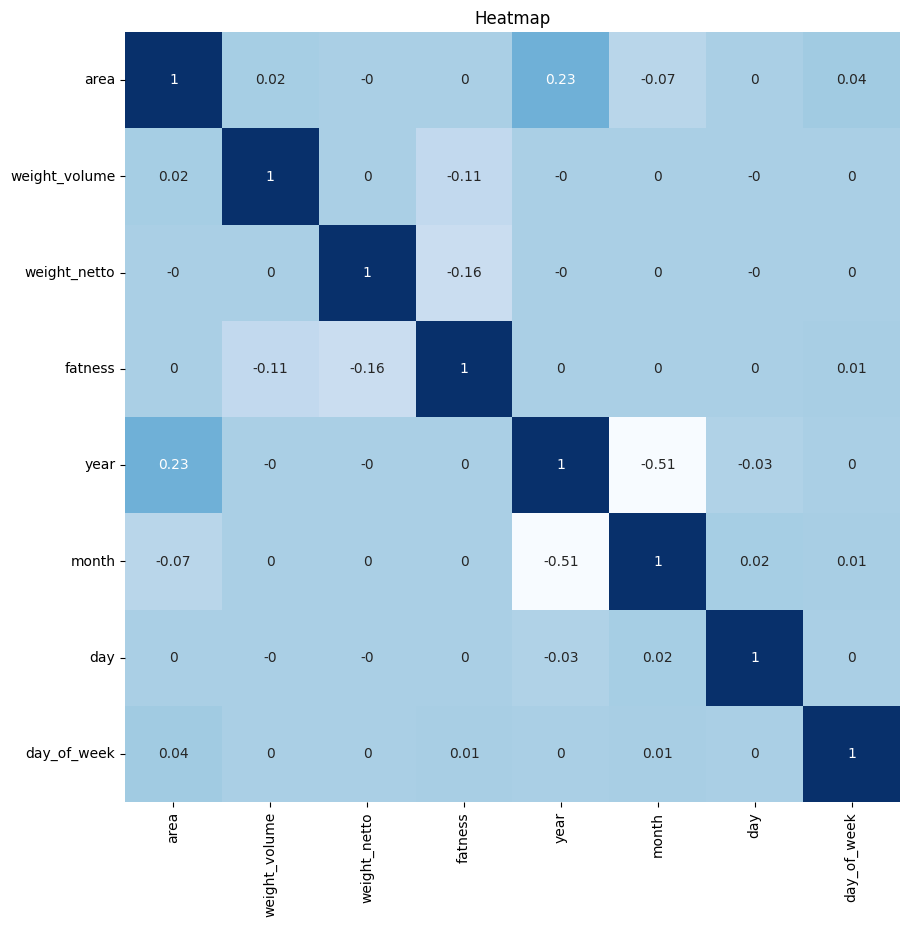

In [17]:
# Draw the correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='Blues', annot=True, cbar=False)
plt.title('Heatmap')
plt.show()

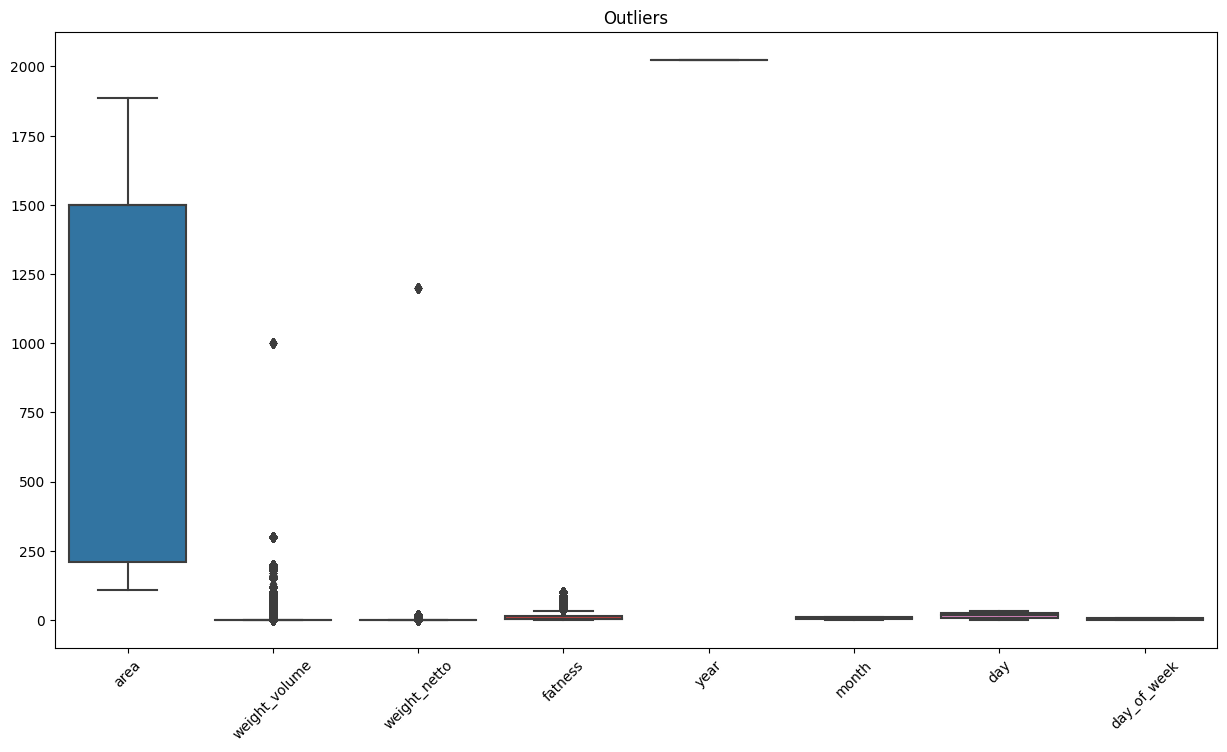

In [18]:
# Draw boxplot of the the numerical columns
plt.figure(figsize=(15, 8))
the_plot = sns.boxplot(data=sales[cor_col])
plt.title('Outliers')
the_plot.set_xticklabels(the_plot.get_xticklabels(), rotation=45)
plt.show()

# Training

In [19]:
# Define the path
path = '/kaggle/input/ml-zoomcamp-2024-competition/'

# Load the data
sales = pd.read_csv(f"{path}/sales.csv")
sales.drop(columns=['Unnamed: 0'], inplace=True)
stores = pd.read_csv(f"{path}/stores.csv")
stores.drop(columns=['Unnamed: 0'], inplace=True)
catalog = pd.read_csv(f"{path}/catalog.csv")
catalog.drop(columns=['Unnamed: 0'], inplace=True)

# Merge sales with store and catalog info for feature enrichment
sales = sales.merge(stores, on="store_id", how="left")
sales = sales.merge(catalog, on="item_id", how="left")

# Add time-based features
sales["date"] = pd.to_datetime(sales["date"])
sales["year"] = sales["date"].dt.year
sales["month"] = sales["date"].dt.month
sales["day"] = sales["date"].dt.day
sales["day_of_week"] = sales["date"].dt.dayofweek

# Select features and target
features = [
    'division', 'format', 'city', 'area', 'dept_name', 'class_name', 'subclass_name', 'item_type', 
    'weight_volume', 'weight_netto', 'fatness', 'year', 'month', 'day', 'day_of_week', 'quantity'
]

sales = sales[features]

In [20]:
# Define the data for use.
df = sales.copy()

# Training functions

In [21]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings('ignore')


class EnsemblePredictor:
    def __init__(self, models):
        self.models = models
    
    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0)

def prepare_subset(df, cat_features):
    """Prepare a subset of data with imputation"""
    # Convert categorical columns to string type and handle NaN
    for col in cat_features:
        df[col] = df[col].astype(str)
        imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
        df[col] = imputer.fit_transform(df[[col]]).ravel()
    
    # Handle numerical features
    numerical_features = [col for col in df.columns if col not in cat_features + ['quantity']]
    num_imputer = SimpleImputer(strategy='mean')
    df[numerical_features] = num_imputer.fit_transform(df[numerical_features])
    
    return df

def train_model_on_subset(subset_data, cat_features, params):
    """Train a single model on a data subset"""
    X = subset_data.drop('quantity', axis=1)
    y = subset_data['quantity']
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = CatBoostRegressor(
        **params,
        cat_features=cat_features,
        eval_metric='RMSE',
        random_seed=np.random.randint(0, 10000),
        verbose=False
    )
    
    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        early_stopping_rounds=50
    )
    
    return model

def efficient_training(df, n_models=5, subset_size=1000000):
    """Train multiple models on different subsets"""
    # Define categorical features
    cat_features = [
        'division', 'format', 'city', 'area', 'dept_name', 
        'class_name', 'subclass_name', 'item_type'
    ]
    
    # Best parameters (you can modify these)
    params = {
        'learning_rate': 0.1,
        'depth': 6,
        'iterations': 1000,
        'l2_leaf_reg': 3,
        'min_data_in_leaf': 5
    }
    
    # Create and train models in parallel
    models = Parallel(n_jobs=-1)(
        delayed(train_model_on_subset)(
            prepare_subset(df.sample(n=subset_size, random_state=i), cat_features),
            cat_features,
            params
        )
        for i in range(n_models)
    )
    
    return EnsemblePredictor(models)

In [22]:
def evaluate_ensemble(ensemble, X_test, y_test):
    """Evaluate the ensemble model"""
    y_pred = ensemble.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [23]:
cat_features = [
        'division', 'format', 'city', 'area', 'dept_name', 
        'class_name', 'subclass_name', 'item_type', 'day_of_week'
    ]

val_size = 1000000  # Size of val set
val_indices = np.random.choice(len(sales), size=val_size, replace=False)
val_data = sales.iloc[val_indices]
train_data = sales.drop(val_indices)

val_data = prepare_subset(val_data, cat_features)

# Train ensemble
print("Training ensemble models...")
ensemble = efficient_training(
    train_data,
    n_models=10,          # Number of models in ensemble
    subset_size=1000000  # Size of each training subset
)

# Evaluate
X_val = val_data.drop('quantity', axis=1)
y_val = val_data['quantity']
rmse = evaluate_ensemble(ensemble, X_val, y_val)

print(f"\Validation set RMSE: {rmse:.4f}")

Training ensemble models...
\Validation set RMSE: 19.8227


# Submission

In [25]:
# Prepare test set for predictions
test = pd.read_csv(f"{path}/test.csv", sep=';')

test = test.merge(stores, on="store_id", how="left")
test = test.merge(catalog, on="item_id", how="left")

test["date"] = pd.to_datetime(test["date"])
test["year"] = test["date"].dt.year
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day
test["day_of_week"] = test["date"].dt.dayofweek

test_rows = test['row_id']

test = test[[f for f in features if f!='quantity']]
print(test.columns, test.shape)

Index(['division', 'format', 'city', 'area', 'dept_name', 'class_name',
       'subclass_name', 'item_type', 'weight_volume', 'weight_netto',
       'fatness', 'year', 'month', 'day', 'day_of_week'],
      dtype='object') (883680, 15)


In [26]:
test_data = prepare_subset(test, cat_features)
test_predictions = ensemble.predict(test_data)

In [27]:
# Create submission file
submission = pd.DataFrame({
    'row_id': test_rows,
    'quantity': test_predictions.round().astype(int)  # Round to nearest integer
})

submission.to_csv('submission.csv', index=False)

In [28]:
print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
